# Sara Khosarvi_Solar Radiation Prediction

### INTROUDUCTION
##############################################################################################################################

### DATA COLLECTION
##############################################################################################################################

In [1]:
# SETTING UP WORKING DIRECTORY
import os
os.chdir(r'C:\Sara\Data SCIENCE\Machine Learning\Project\Data')
os.getcwd()

'C:\\Sara\\Data SCIENCE\\Machine Learning\\Project\\Data'

In [2]:
# IMPORTING PACKAGES AND LIBRARIES
import warnings
warnings.filterwarnings('ignore')

#import libraries for the data-structures
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

#import libraries for modeling
import statsmodels.api as sm
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
import math
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from datetime import datetime
print('Libraries imported and installed.')

Libraries imported and installed.


In [3]:
#import the dataset
data=pd.read_csv(r'C:\Sara\Data SCIENCE\Machine Learning\Project\Data\SolarPrediction.csv')
data.shape

(32686, 11)

In [4]:
data.head(5)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [5]:
data.tail(5)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00
32685,1480586402,12/1/2016 12:00:00 AM,00:00:02,1.20,44,30.43,101,83.59,3.37,06:41:00,17:42:00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [7]:
#making a copy of data before preprocessing
data_raw=data.copy()

In [8]:
#pandas_profiling.ProfileReport(data)

## Data Preprocessing 
###############################################################################################################################

In [9]:
#Checking Missing Value
data.isna().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [10]:
#drop duplicate
data=data.drop_duplicates()

In [11]:
#Count Features and Describe 
data.astype('object').describe().transpose()

,count,unique,top,freq
UNIXTime,32686,32686,1478754303,1
Data,32686,118,11/17/2016 12:00:00 AM,288
Time,32686,8299,16:20:18,24
Radiation,32686,14434,1.22,2264
Temperature,32686,38,45,2951
Pressure,32686,38,30.44,3297
Humidity,32686,94,102,2107
WindDirection(Degrees),32686,17951,0.11,94
Speed,32686,37,5.62,4609
TimeSunRise,32686,51,06:11:00,1399


In [12]:
#finding just unique values
data.apply(lambda x: len(x.unique()))

UNIXTime                  32686
Data                        118
Time                       8299
Radiation                 14434
Temperature                  38
Pressure                     38
Humidity                     94
WindDirection(Degrees)    17951
Speed                        37
TimeSunRise                  51
TimeSunSet                   56
dtype: int64

In [13]:
#Converting UNIX time to datetime object
data['Date']= pd.to_datetime(data['UNIXTime'],unit='s')

#Setting the right timezone to the datetime object
data['Date'] = data['Date'].dt.tz_localize('UTC').dt.tz_convert('HST')

In [14]:
#Extracting date from Data column
data['Data'] = pd.to_datetime(data['Data']).dt.date

#Converting Sunrise and Sunset columns into datetime.time objects
data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise']).dt.time
data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet']).dt.time

#Creating new sunset/sunrise columns featuring also the right date
data['sunrise_time'] = data.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunRise']), axis = 1)
data['sunset_time'] = data.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunSet']), axis = 1)

#Adding approriate timezone
data['sunrise_time'] = data['sunrise_time'].dt.tz_localize('HST')
data['sunset_time'] = data['sunset_time'].dt.tz_localize('HST')

In [15]:
#Setting 'Date' as index
data.set_index('Date', inplace = True)

#Sorting by the index
data.sort_index()

data.drop(columns = ['Data', 'Time', 'TimeSunRise','TimeSunSet'], inplace = True)

In [16]:
#Inspecting the first rows of the dataset
data.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,sunrise_time,sunset_time
Date,,,,,,,,,
2016-09-29 23:55:26-10:00,1475229326,1.21,48,30.46,59,177.39,5.62,2016-09-29 06:13:00-10:00,2016-09-29 18:13:00-10:00
2016-09-29 23:50:23-10:00,1475229023,1.21,48,30.46,58,176.78,3.37,2016-09-29 06:13:00-10:00,2016-09-29 18:13:00-10:00
2016-09-29 23:45:26-10:00,1475228726,1.23,48,30.46,57,158.75,3.37,2016-09-29 06:13:00-10:00,2016-09-29 18:13:00-10:00
2016-09-29 23:40:21-10:00,1475228421,1.21,48,30.46,60,137.71,3.37,2016-09-29 06:13:00-10:00,2016-09-29 18:13:00-10:00
2016-09-29 23:35:24-10:00,1475228124,1.17,48,30.46,62,104.95,5.62,2016-09-29 06:13:00-10:00,2016-09-29 18:13:00-10:00


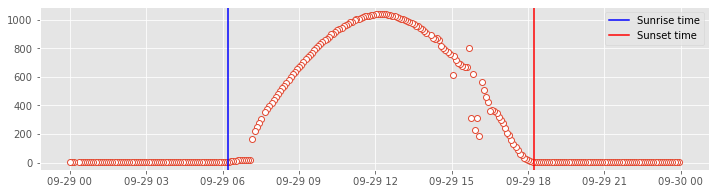

In [17]:
#Analysing the ranges of the various features of the datset

#Showing Important Time in Prediction
data_one_day = data.loc['2016-09-29':'2016-09-30',:]

plt.figure(figsize = (12,3))
plt.plot(data_one_day.Radiation, 'o', markerfacecolor = 'w')

#Plotting vertical line at sunrise
plt.axvline(data_one_day.sunrise_time.iloc[0], label = 'Sunrise time', color = 'blue')

#Plotting vertical line at sunset
plt.axvline(data_one_day.sunset_time.iloc[0], label = 'Sunset time', color = 'red') 

#Adjusting timezone of x-axis
plt.gca().xaxis_date('HST')

plt.legend()
plt.show()

In [18]:
#Getting the summary of Data
data.describe()# for numeric columns
pd.options.display.float_format = "{:.2f}".format
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UNIXTime,32686.00,1478047264.94,3005036.64,1472724008.00,1475546497.50,1478026069.50,1480480128.00,1483264501.00
Radiation,32686.00,207.12,315.92,1.11,1.23,2.66,354.24,1601.26
Temperature,32686.00,51.10,6.20,34.00,46.00,50.00,55.00,71.00
Pressure,32686.00,30.42,0.05,30.19,30.40,30.43,30.46,30.56
Humidity,32686.00,75.02,25.99,8.00,56.00,85.00,97.00,103.00
WindDirection(Degrees),32686.00,143.49,83.17,0.09,82.23,147.70,179.31,359.95
Speed,32686.00,6.24,3.49,0.00,3.37,5.62,7.87,40.50


## Exploratory Analysis 
###############################################################################################################################

<AxesSubplot:>

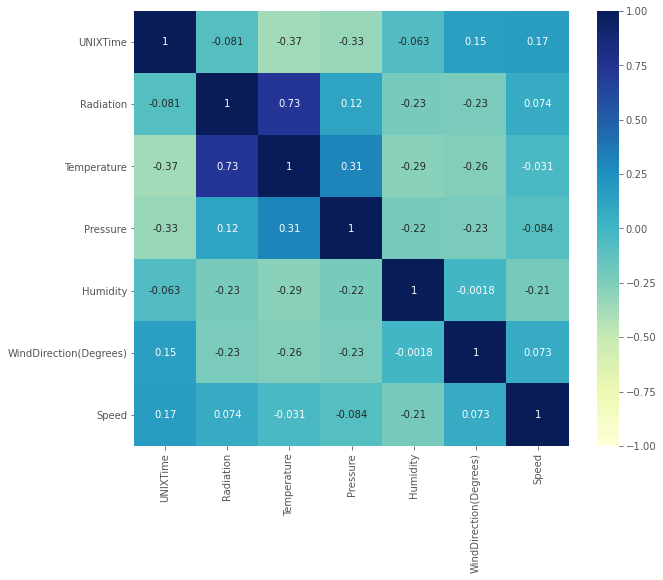

In [19]:
#Correlation Plot for finding the relation between Numerical variables
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, vmin=-1,vmax=1,cmap ="YlGnBu", annot=True,square=True)


In [20]:
#There is a high relashionship between Radiation and Temperature

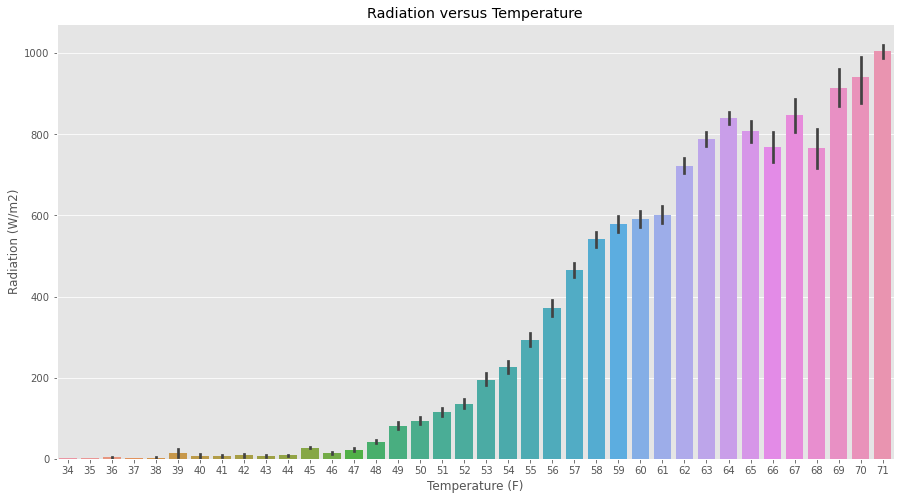

In [21]:
#Display Radiation versus Temperature
plt.figure(figsize=(15,8))
sns.barplot(x=data['Temperature'],y=data['Radiation'])
plt.xlabel('Temperature (F)')
plt.ylabel('Radiation (W/m2)')
plt.title('Radiation versus Temperature')
plt.show()

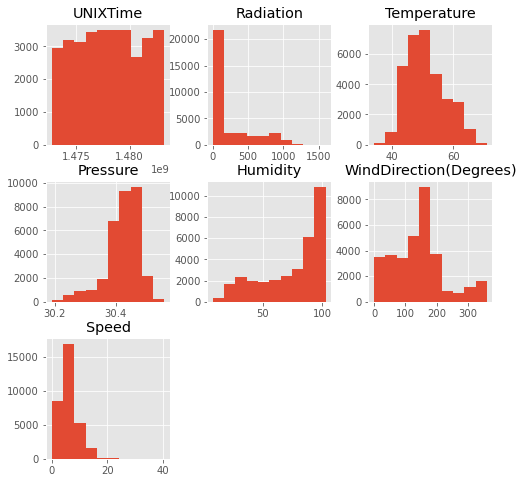

In [22]:
#Histogram Plot
data.hist(figsize=[8,8])
plt.show()

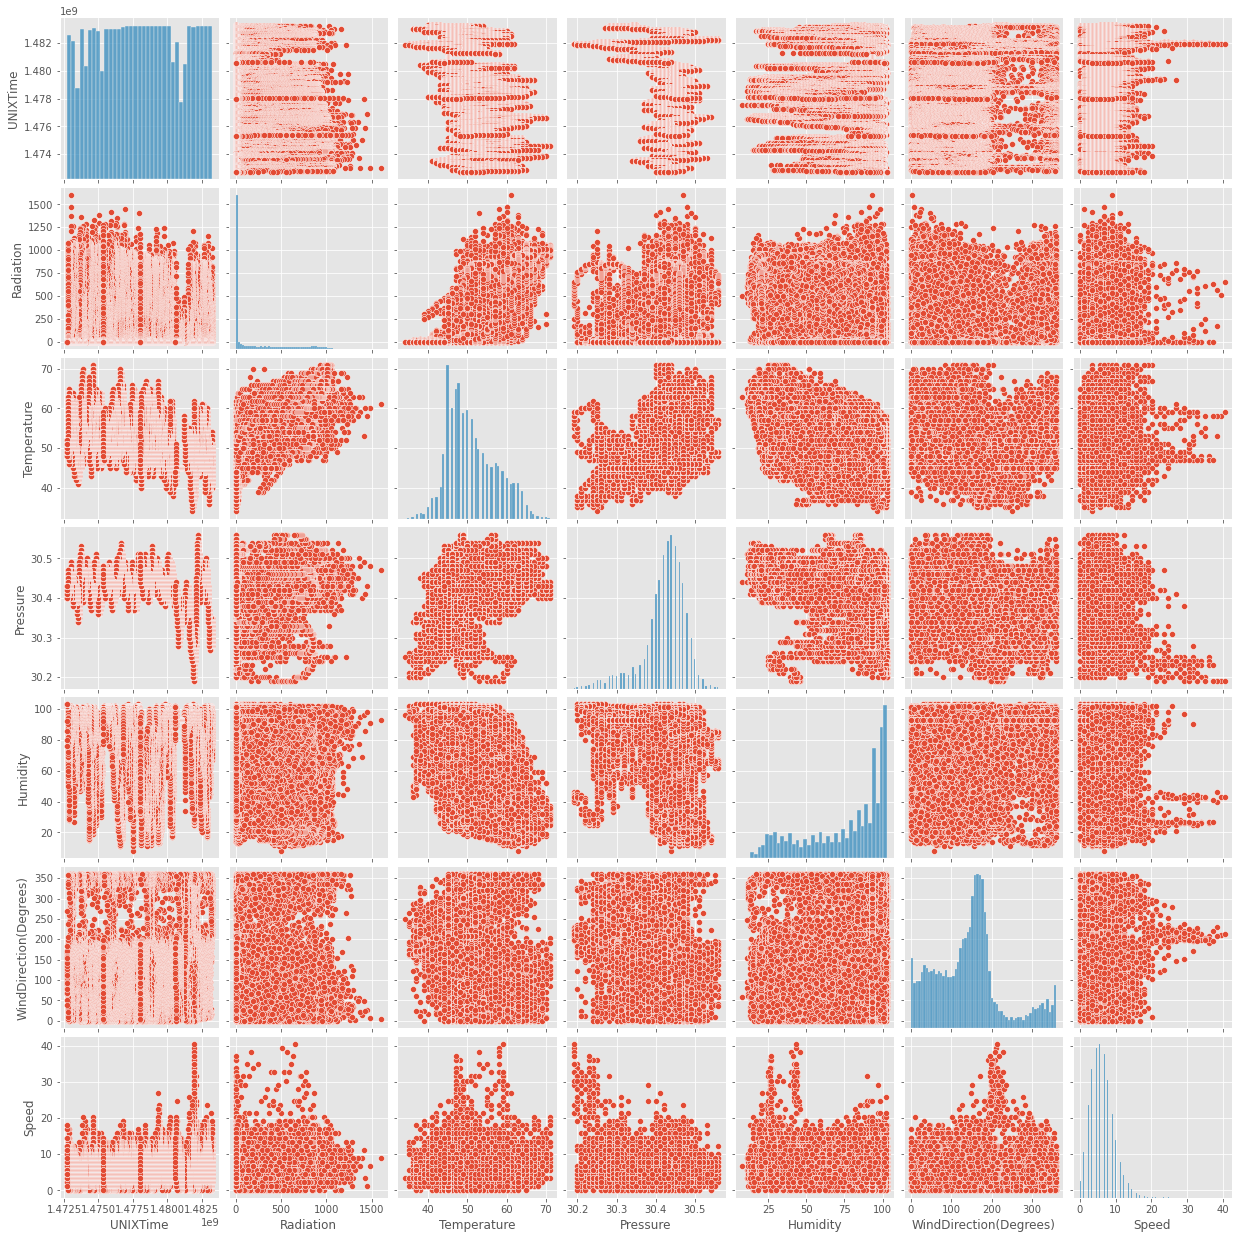

In [23]:
# Pairplot of all the numeric variables
sns.pairplot(data=data)
plt.show()

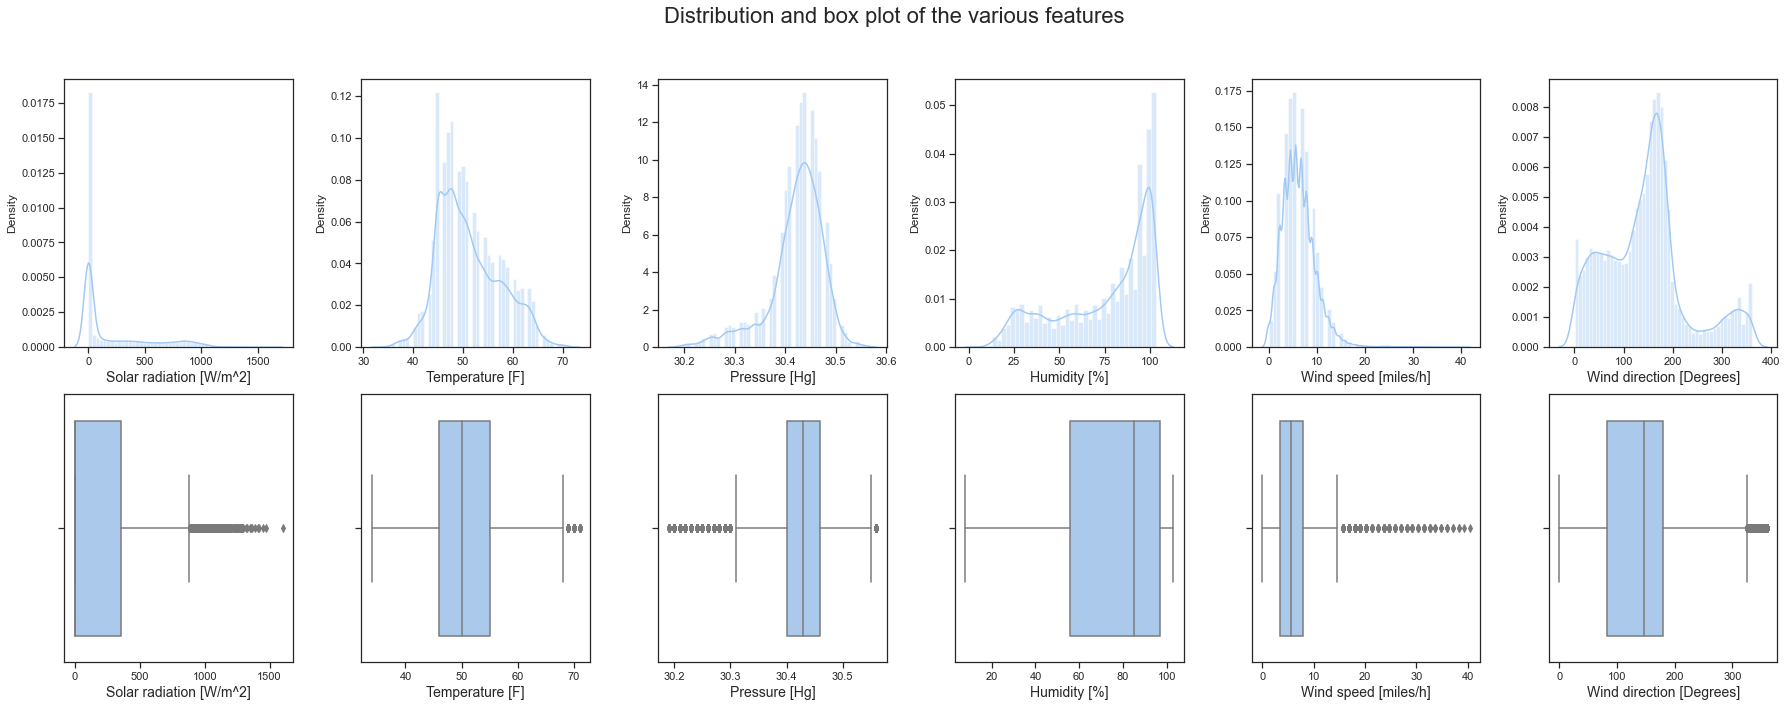

In [24]:
#Density-Plot and Box-Plot
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(nrows =2, ncols = 6, figsize = (25, 10))

sns.distplot(data.Radiation, ax = ax[0,0])
ax[0,0].set_xlabel('Solar radiation [W/m^2]', fontsize = 14)

sns.distplot(data.Temperature, ax = ax[0,1])
ax[0,1].set_xlabel('Temperature [F]', fontsize = 14)

sns.distplot(data.Pressure, ax = ax[0,2])
ax[0,2].set_xlabel('Pressure [Hg]', fontsize = 14)

sns.distplot(data.Humidity, ax = ax[0,3])
ax[0,3].set_xlabel('Humidity [%]', fontsize = 14)

sns.distplot(data.Speed, ax = ax[0,4])
ax[0,4].set_xlabel('Wind speed [miles/h]', fontsize = 14)

sns.distplot(data['WindDirection(Degrees)'], ax = ax[0,5])
ax[0,5].set_xlabel('Wind direction [Degrees]', fontsize = 14)

sns.boxplot(data.Radiation, ax = ax[1,0])
ax[1,0].set_xlabel('Solar radiation [W/m^2]', fontsize = 14)

sns.boxplot(data.Temperature, ax = ax[1,1])
ax[1,1].set_xlabel('Temperature [F]', fontsize = 14)

sns.boxplot(data.Pressure, ax = ax[1,2])
ax[1,2].set_xlabel('Pressure [Hg]', fontsize = 14)

sns.boxplot(data.Humidity, ax = ax[1,3])
ax[1,3].set_xlabel('Humidity [%]', fontsize = 14)

sns.boxplot(data.Speed, ax = ax[1,4])
ax[1,4].set_xlabel('Wind speed [miles/h]', fontsize = 14)

sns.boxplot(data['WindDirection(Degrees)'], ax = ax[1,5])
ax[1,5].set_xlabel('Wind direction [Degrees]', fontsize = 14)

fig.suptitle('Distribution and box plot of the various features', fontsize = 22)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

### DATA PREPROCESSING 
###############################################################################################################################

In [25]:
#Shuffling data
data = data.sample(frac=1, random_state=0)

In [26]:
#Renaming dataset
df = data

#Splitting dataset into labels and features
X = df.drop(columns = ['Radiation','UNIXTime','sunrise_time','sunset_time'])
y = df.Radiation

In [27]:
# DATA PREPROCESSING - Scaling Data

#standardizing all the columns
sc = StandardScaler()
scaled = sc.fit_transform(X)

#converted to dataframe to work easily on columns
x_scl = pd.DataFrame(scaled, columns=X.columns)
#print(data)

Dataset is well STANDARDISED.

### Data Handling - Predictive / Supervised Learning
##############################################################################################################################

In [28]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              Radiation   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     8522.
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        22:41:34   Log-Likelihood:            -2.2086e+05
No. Observations:               32686   AIC:                         4.417e+05
Df Residuals:                   32680   BIC:                         4.418e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.09

In [29]:
#P-VALUE less than 0.05 significant level therefore we do not need to backward feature elimination

In [30]:
#scaling data is necessary for making gradient descent faster 
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
y = pd.Series(y)

In [31]:
#For cross-validation using train-test split ( TEST-SIZE = 30% )
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [32]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("y_train shape {}, len {}.".format(y_train.shape,len(y_train)))
print("y_test shape {}, len {}.".format(y_test.shape,len(y_test)))

X_train shape (24514, 5), len 24514.
X_test shape (8172, 5), len 8172.
y_train shape (24514,), len 24514.
y_test shape (8172,), len 8172.


In [33]:
#display R-squared,Adjust R-squared and Root Mean Square Error(RMSE)

results_df = pd.DataFrame()
columns = ["Model", "Cross Val Score", "MAE", "MSE", "RMSE", "R2","AdjustR2"]

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    adjusted_r2_squared = 1 - (1-r2_square)*(len(true)-1)/(len(true)-X.shape[1]-1)
    return mae, mse, rmse, r2_square, adjusted_r2_squared


def append_results(model_name, model, results_df, y_test, pred):
    results_append_df = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred), cross_val_score(model, X, y,cv=5).mean()]], columns=columns)
    results_df = results_df.append(results_append_df, ignore_index = True)
    return results_df

In [34]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [35]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
pred_l_reg = l_reg.predict(X_test)

In [36]:
# COEFFICIENTS
cdf1 =pd.DataFrame(l_reg.coef_,X.columns,columns=['Coeffecient_l_reg'])
cdf1

,Coeffecient_l_reg
0,237.77
1,-40.85
2,-7.31
3,-21.61
4,27.50


In [37]:
svr = SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)

In [38]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
pred_rf = rf_reg.predict(X_test)

In [40]:
adab_reg = AdaBoostRegressor()
adab_reg.fit(X_train, y_train)
pred_adab = adab_reg.predict(X_test)

## Regularization and Optimization  all Models 
###############################################################################################################################

In [42]:
#for no.of neighbors from 1 - 10, graph the k-fold scores
scores = []
for i in range(1,11,1):
    knn = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(knn,X,y,cv=3).mean())

In [43]:
scores

[0.5335988103463053,
 0.6412356789929258,
 0.6727214169916675,
 0.689533442696001,
 0.6996654585742691,
 0.7058681475902661,
 0.7098270608063354,
 0.7124997026441854,
 0.7139277866756938,
 0.71491266056336]

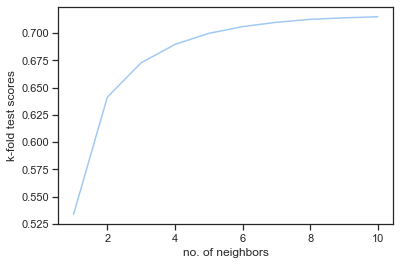

In [44]:
plt.plot(range(1,11,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()

In [45]:
#KNN TUNING:

#Initiating Random Forest regressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')

#Define the grid of hyperparameters
params_grid = {'n_neighbors': [3,5,10],
              'weights': ['uniform']
              }

#Initiate Grid search
grid_model = GridSearchCV(estimator = knn_model, param_grid = params_grid , cv = 3)
                       
#Fitting the grid search
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 10], 'weights': ['uniform']})

In [46]:
#let's create a model to test

#K-fold score within the training set of the best model
knn_opt = grid_model.best_estimator_

#training on the same set
knn_opt.fit(X_train,y_train)

#let's create a y prediction on based X_test
pred_knn_opt = knn_opt.predict(X_test)

In [47]:
SSE = np.sum((y_test-pred_knn_opt)**2)
SST = np.sum((y_test-np.mean(pred_knn_opt))**2)
SSR = SST-SSE
R2 =1-(SSE/SST)

In [48]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
n = len(X_test)#Total size of test 
k = len(X_test.iloc[0])
AdjustR2_knn_opt = 1-((n-1)*(1- R2)/(n-k-1))

In [49]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model.best_score_)
print('Test R^2        : %.3f'%r2_score(y_test, grid_model.best_estimator_.predict(X_test)))
print('Test R^2        : %.3f'%grid_model.best_estimator_.score(X_test, y_test))
print('Training R^2    : %.3f'%grid_model.best_estimator_.score(X_train, y_train))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('SSE=', float(SSE))
print('SST=', float(SST))
print('SSR=', float(SSR))
print('Coefficient of Determination=', float(R2))
print('-----------------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------------\n')
print('Checking the performance of the model:')
print('R2        :',r2_score(y_test,pred_knn_opt)) #R^2
print('AdjustR2  :',AdjustR2_knn_opt)
print('RMSE      :',math.sqrt(mean_squared_error(y_test, pred_knn_opt))) #Root-Mean Square Error (RMSE)
#print('MSE       :',mean_squared_error(y_test,pred)) #MSE (SAMPLE COMMON VARIANCE ESTIMATE ERRORS)
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred = grid_model.best_estimator_.predict(X_test)
print(pred_knn_opt[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'n_neighbors': 10, 'weights': 'uniform'}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.7063071070354745
Test R^2        : 0.719
Test R^2        : 0.719
Training R^2    : 0.771
---------------------------------------------------------------------------------------------------------------------

SSE= 229578722.90612
SST= 818016359.1543036
SSR= 588437636.2481835
Coefficient of Determination= 0.719347027309494
-----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------

Checking the performance of the model:
R2       

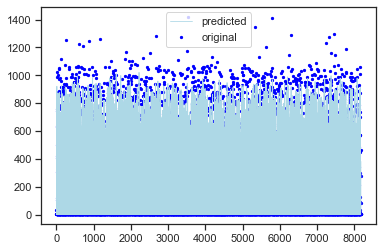

In [51]:
# PLOTTING THE PREDICTIONS
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred_knn_opt, lw=0.8, color="lightblue", label="predicted")
plt.legend()
plt.show()

In [52]:
lregressor = SGDRegressor(loss='squared_loss',learning_rate='constant', eta0=0.01, penalty='l2')

In [53]:
#compare that k-fold scores
print("linear regression's 5-fold score:",cross_val_score(lregressor, X,y, cv=5).mean())

linear regression's 5-fold score: 0.5481804504177064


In [54]:
# Linear Regression TUNING:

'''We are defining a param_grid here to try out different configuration 
(non-exhaustive) which gives us an idea of what values/range of values 
will give a better model to test/deploy 
'''
params = {
            'loss': ['squared_loss'],
            'penalty':['elasticnet'],
            'alpha': [0.1],
            'l1_ratio':[1],
            'learning_rate':['optimal'],
            'eta0':[0.001],
            'power_t':[0.01]
         }
grid_model = GridSearchCV(SGDRegressor(random_state=7), params, cv=4)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=SGDRegressor(random_state=7),
             param_grid={'alpha': [0.1], 'eta0': [0.001], 'l1_ratio': [1],
                         'learning_rate': ['optimal'], 'loss': ['squared_loss'],
                         'penalty': ['elasticnet'], 'power_t': [0.01]})

In [55]:
#let's create a model to test

#K-fold score within the training set of the best model
l_sgdreg = grid_model.best_estimator_

#training on the same set
l_sgdreg.fit(X_train,y_train)

#let's create a y prediction on based X_test
pred_l_sgdreg = l_sgdreg.predict(X_test)

In [56]:
#the best linear model's internal attributes (coefficient)
cdf2 =pd.DataFrame(l_sgdreg.coef_,X.columns,columns=['Coeffecient_l_sgdreg'])
cdf2

,Coeffecient_l_sgdreg
0,237.66
1,-40.70
2,-7.20
3,-21.49
4,27.41


In [57]:
#model's intercept
l_sgdreg.intercept_

array([207.1642639])

In [58]:
#Coeffecient
cdf1['Coeffecient_l_sgdreg'] = pd.DataFrame(l_sgdreg.coef_,X.columns,columns=['Coeffecient_l_sgdreg'])
cdf1

,Coeffecient_l_reg,Coeffecient_l_sgdreg
0,237.77,237.66
1,-40.85,-40.70
2,-7.31,-7.20
3,-21.61,-21.49
4,27.50,27.41


In [60]:
SSE = np.sum((y_test-pred_l_sgdreg)**2)
SST = np.sum((y_test-np.mean(pred_l_sgdreg))**2)
SSR = SST-SSE
R2 =1-(SSE/SST)

In [61]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
n = len(X_test)#Total size of test 
k = len(X_test.iloc[0])
AdjustR2_l_sgdreg = 1-((n-1)*(1- R2)/(n-k-1))

In [62]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model.best_score_)
print('Test R^2        : %.3f'%r2_score(y_test, grid_model.best_estimator_.predict(X_test)))
print('Test R^2        : %.3f'%grid_model.best_estimator_.score(X_test, y_test))
print('Training R^2    : %.3f'%grid_model.best_estimator_.score(X_train, y_train))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('SSE=', float(SSE))
print('SST=', float(SST))
print('SSR=', float(SSR))
print('Coefficient of Determination=', float(R2))
print('-----------------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------------\n')
print('Checking the performance of the model:')
print('R2        :',r2_score(y_test,pred_l_sgdreg)) #R^2
print('AdjustR2  :',AdjustR2_l_sgdreg)
print('RMSE      :',math.sqrt(mean_squared_error(y_test, pred_l_sgdreg))) #Root-Mean Square Error (RMSE)
#print('MSE       :',mean_squared_error(y_test,pred)) #MSE (SAMPLE COMMON VARIANCE ESTIMATE ERRORS)
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred = grid_model.best_estimator_.predict(X_test)
print(pred_l_sgdreg[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'alpha': 0.1, 'eta0': 0.001, 'l1_ratio': 1, 'learning_rate': 'optimal', 'loss': 'squared_loss', 'penalty': 'elasticnet', 'power_t': 0.01}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.5640632570427987
Test R^2        : 0.569
Test R^2        : 0.569
Training R^2    : 0.565
---------------------------------------------------------------------------------------------------------------------

SSE= 352156090.9726885
SST= 817852006.4247406
SSR= 465695915.45205206
Coefficient of Determination= 0.5694134290723976
-----------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------

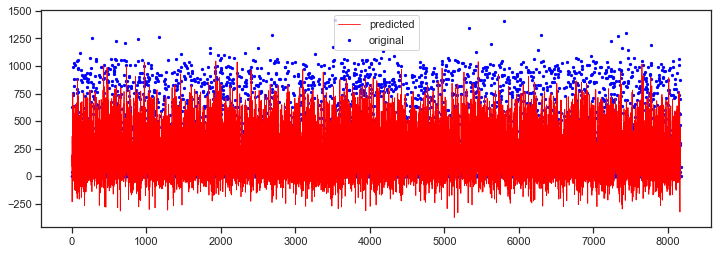

In [101]:
# plotting the result
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred_l_sgdreg, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [63]:
svr = SVR(kernel='rbf',C=1, gamma='auto')

In [64]:
print("svr's 5-fold score:",cross_val_score(svr,X,y,cv=5).mean())

svr's 5-fold score: 0.595771157129013


In [65]:
#compare that k-fold scores
svr_sgd = SGDRegressor(loss='epsilon_insensitive',learning_rate='constant', eta0=0.01, penalty='l2')
svr_sgd

SGDRegressor(learning_rate='constant', loss='epsilon_insensitive')

In [66]:
#compare that k-fold scores
print("svr's 5-fold score:",cross_val_score(svr_sgd, X,y, cv=5).mean()) 

svr's 5-fold score: 0.5325028644336044


In [67]:
#Gradient descent can used in different models that have a loss function
#SVR TUNING

'''We are defining a param_grid here to try out different configuration 
(non-exhaustive) which gives us an idea of what values/range of values 
will give a better model to test/deploy 
'''
params_grid = {
                'kernel' : ['rbf'],   
                'C' : [1],
                'degree' : [3],
                'epsilon':[0.1],
                'gamma' : ['auto']
         }
grid_model = GridSearchCV(SVR(),params_grid)
#grid_model = GridSearchCV(SVR(),params_grid,refit=True,verbose=3)
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1], 'degree': [3], 'epsilon': [0.1],
                         'gamma': ['auto'], 'kernel': ['rbf']})

In [68]:
#let's create a model to test

#K-fold score within the training set of the best model
svr_sgd = grid_model.best_estimator_

#training on the same set
svr_sgd.fit(X_train,y_train)

#let's create a y prediction on based X_test
pred_svr_sgd = svr_sgd.predict(X_test)

In [69]:
SSE = np.sum((y_test-pred_svr_sgd)**2)
SST = np.sum((y_test-np.mean(pred_svr_sgd))**2)
SSR = SST-SSE
R2 =1-(SSE/SST)

In [70]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
n = len(X_test)#Total size of test 
k = len(X_test.iloc[0])
AdjustR2_svr_sgd = 1-((n-1)*(1- R2)/(n-k-1))

In [71]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model.best_score_)
print('Test R^2        : %.3f'%r2_score(y_test, grid_model.best_estimator_.predict(X_test)))
print('Test R^2        : %.3f'%grid_model.best_estimator_.score(X_test, y_test))
print('Training R^2    : %.3f'%grid_model.best_estimator_.score(X_train, y_train))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('SSE=', float(SSE))
print('SST=', float(SST))
print('SSR=', float(SSR))
print('Coefficient of Determination=', float(R2))
print('-----------------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------------\n')
print('Checking the performance of the model:')
print('R2        :',r2_score(y_test,pred_svr_sgd)) #R^2
print('AdjustR2  :',AdjustR2_svr_sgd)
print('RMSE      :',math.sqrt(mean_squared_error(y_test, pred_svr_sgd))) #Root-Mean Square Error (RMSE)
#print('MSE       :',mean_squared_error(y_test,pred)) #MSE (SAMPLE COMMON VARIANCE ESTIMATE ERRORS)
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred = grid_model.best_estimator_.predict(X_test)
print(pred_svr_sgd[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'C': 1, 'degree': 3, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.5692576169270582
Test R^2        : 0.599
Test R^2        : 0.599
Training R^2    : 0.590
---------------------------------------------------------------------------------------------------------------------

SSE= 328158893.5856098
SST= 840011135.7686944
SSR= 511852242.1830846
Coefficient of Determination= 0.609339829423438
-----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------

Checking the per

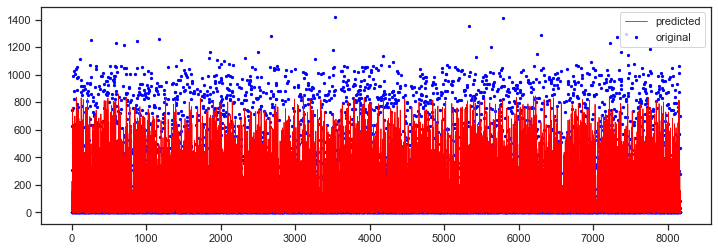

In [102]:
# plotting the result
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred_svr_sgd, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [73]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(RandomForestRegressor(n_estimators=i,random_state=9), X,y,cv=4).mean())
 

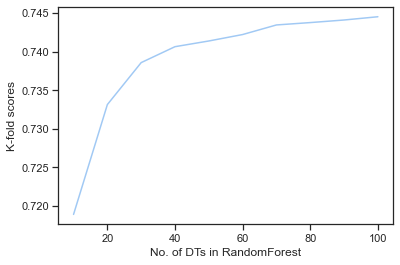

In [74]:
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

In [75]:
#RANDOM FOREST TUNING:

#Initiating Random Forest regressor
rf_model = RandomForestRegressor(random_state = 9)

#Define the grid of hyperparameters
params_grid = {'n_estimators': [550],
              'max_depth': [19],
              'min_samples_split': [0.001],
              'min_samples_leaf': [1],
              'max_features': [3], 
              'n_jobs': [-1]
              }

#Initiate Grid search
grid_model = GridSearchCV(estimator = rf_model,
                       param_grid = params_grid ,
                       cv = 3,
                       scoring = 'neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = -1)

#Fitting the grid search
grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.7s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=9), n_jobs=-1,
             param_grid={'max_depth': [19], 'max_features': [3],
                         'min_samples_leaf': [1], 'min_samples_split': [0.001],
                         'n_estimators': [550], 'n_jobs': [-1]},
             scoring='neg_mean_squared_error', verbose=1)

In [76]:
#let's create a model to test

#K-fold score within the training set of the best model
rf_sgd = grid_model.best_estimator_

#training on the same set
rf_sgd.fit(X_train,y_train)

#let's create a y prediction on based X_test
pred_rf_sgd = rf_sgd.predict(X_test)

In [77]:
SSE = np.sum((y_test-pred_rf_sgd)**2)
SST = np.sum((y_test-np.mean(pred_rf_sgd))**2)
SSR = SST-SSE
R2 =1-(SSE/SST)

In [78]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
n = len(X_test)#Total size of test 
k = len(X_test.iloc[0])
AdjustR2_rf_sgd = 1-((n-1)*(1- R2)/(n-k-1))

In [79]:
#Checking if there is overfitting through the use of Cross validation
rf_MSE_CV = -cross_val_score(rf_sgd, X_train, y_train,
                            cv = 10, 
                            scoring = 'neg_mean_squared_error',
                            n_jobs = -1)

In [80]:
#Computing Random Forest predictions in the traning and test sets
rf_predict_train = rf_sgd.predict(X_train)
rf_predict_test = rf_sgd.predict(X_test)

In [81]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score             :',grid_model.best_score_)
print('R^2 Score Test set     : %.3f'%r2_score(y_test, grid_model.best_estimator_.predict(X_test)))
print('Test R^2               : %.3f'%grid_model.best_estimator_.score(X_test, y_test))
print('R^2 score training set : %.3f'%grid_model.best_estimator_.score(X_train, y_train))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('SSE=', float(SSE))
print('SST=', float(SST))
print('SSR=', float(SSR))
print('Coefficient of Determination=', float(R2))
print('-----------------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------------\n')
print('Checking the performance of the model:')
print('R2        :',r2_score(y_test,pred_rf_sgd)) #R^2
print('AdjustR2  :',AdjustR2_rf_sgd)
print('RMSE      :',math.sqrt(mean_squared_error(y_test, pred_rf_sgd))) #Root-Mean Square Error (RMSE)
#print('MSE       :',mean_squared_error(y_test,pred)) #MSE (SAMPLE COMMON VARIANCE ESTIMATE ERRORS)
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Computing the MSE in the traning set, test set, and cross-validation procedure:')
print('CV MSE for RF    :{:.2f}'.format(rf_MSE_CV.mean()))
print('Train MSE for RF :{:.2f}'.format(MSE(y_train,rf_predict_train)))
print('Test MSE for RF  :{:.2f}'.format(MSE(y_test,rf_predict_test)))
print('---------------------------------------------------------------------------------------------------------------------\n')
pred = grid_model.best_estimator_.predict(X_test)
print(pred_rf_sgd[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'max_depth': 19, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 0.001, 'n_estimators': 550, 'n_jobs': -1}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score             : -26805.33237347941
R^2 Score Test set     : 0.736
Test R^2               : 0.736
R^2 score training set : 0.820
---------------------------------------------------------------------------------------------------------------------

SSE= 215590272.85909516
SST= 817852537.2993281
SSR= 602262264.440233
Coefficient of Determination= 0.736394688496038
-----------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------

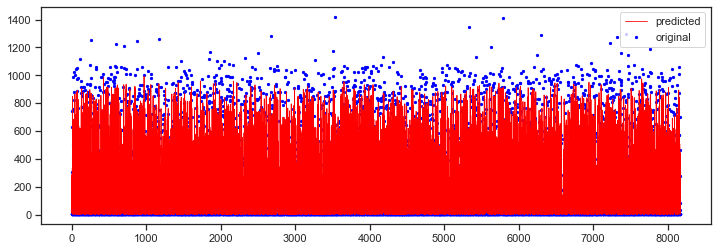

In [103]:
# DISPLAY RESULT FOR ADABOOST MODEL
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred_rf_sgd, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [83]:
#Graph k-fold score vs no. of estimators in Ada Boost
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(AdaBoostRegressor(n_estimators=i,random_state=0),
                                  X,y,cv=15).mean())

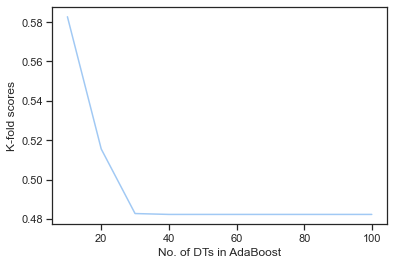

In [84]:
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in AdaBoost')
plt.ylabel('K-fold scores')
plt.show()

In [85]:
#including other params like max_depth, we will apply gridsearch to fine the best settings 
#Ada Boost TUNING

params = {
            'n_estimators': [100],
            'base_estimator': [DecisionTreeRegressor(max_depth = 19, random_state = 0)]
        }
grid_model = GridSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
grid_model.fit(X,y)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=19,
                                                                  random_state=0)],
                         'n_estimators': [100]})

In [86]:
#let's create a model to test

#K-fold score within the training set of the best model
adab_sgd = grid_model.best_estimator_

#training on the same set
adab_sgd.fit(X_train,y_train)

#let's create a y prediction on based X_test
pred_adab_sgd = adab_sgd.predict(X_test)

In [87]:
SSE = np.sum((y_test-pred)**2)
SST = np.sum((y_test-np.mean(pred))**2)
SSR = SST-SSE
R2 =1-(SSE/SST)

In [88]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
n = len(X_test)#Total size of test 
k = len(X_test.iloc[0])
AdjustR2_adab_sgd = 1-((n-1)*(1- R2)/(n-k-1))

In [89]:
#Checking if there is overfitting through the use of Cross validation
adab_MSE_CV = -cross_val_score(adab_sgd, X_train, y_train,
                            cv = 10, 
                            scoring = 'neg_mean_squared_error',
                            n_jobs = -1)

In [90]:
#Computing Random Forest predictions in the traning and test sets
adab_predict_train = adab_sgd.predict(X_train)
adab_predict_test = adab_sgd.predict(X_test)

In [91]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score             :',grid_model.best_score_)
print('R^2 Score Test set     : %.3f'%r2_score(y_test, grid_model.best_estimator_.predict(X_test)))
print('Test R^2               : %.3f'%grid_model.best_estimator_.score(X_test, y_test))
print('R^2 score training set : %.3f'%grid_model.best_estimator_.score(X_train, y_train))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('SSE=', float(SSE))
print('SST=', float(SST))
print('SSR=', float(SSR))
print('Coefficient of Determination=', float(R2))
print('-----------------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------------\n')
print('Checking the performance of the model:')
print('R2        :',r2_score(y_test,pred_adab_sgd)) #R^2
print('AdjustR2  :',AdjustR2_adab_sgd)
print('RMSE      :',math.sqrt(mean_squared_error(y_test, pred_adab_sgd))) #Root-Mean Square Error (RMSE)
#print('MSE       :',mean_squared_error(y_test,pred)) #MSE (SAMPLE COMMON VARIANCE ESTIMATE ERRORS)
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Computing the MSE in the traning set, test set, and cross-validation procedure:')
print('CV MSE for RF    :{:.2f}'.format(rf_MSE_CV.mean()))
print('Train MSE for RF :{:.2f}'.format(MSE(y_train,rf_predict_train)))
print('Test MSE for RF  :{:.2f}'.format(MSE(y_test,rf_predict_test)))
print('---------------------------------------------------------------------------------------------------------------------\n')
pred = grid_model.best_estimator_.predict(X_test)
print(pred_adab_sgd[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'base_estimator': DecisionTreeRegressor(max_depth=19, random_state=0), 'n_estimators': 100}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score             : 0.7255461338287782
R^2 Score Test set     : 0.723
Test R^2               : 0.723
R^2 score training set : 0.999
---------------------------------------------------------------------------------------------------------------------

SSE= 215590272.85909516
SST= 817852537.2993281
SSR= 602262264.440233
Coefficient of Determination= 0.736394688496038
-----------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------

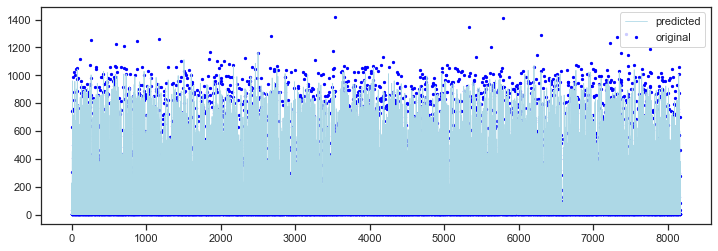

In [104]:
# PLOTTING THE PREDICTIONS
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax,pred_adab_sgd, lw=0.8, color="lightblue", label="predicted")
plt.legend()
plt.show()


In [95]:
#Inference
################################################################################################################################ Creating an empty Dataframe with column names only
results_opt = pd.DataFrame(columns=['opt_model', 'R2','adjustR2','RMSE'])
print("Empty Dataframe ", results_opt, sep='\n')
print('*** Appends rows to an empty DataFrame using dictionary with default index***')

# Append rows in Empty Dataframe by adding dictionaries
results_opt = results_opt.append({'opt_model': 'Linear Regression','R2':'0.5694133335037193', 'adjustR2': '0.5691497831190988', 'RMSE': '207.58856332110182'}, ignore_index=True)
results_opt = results_opt.append({'opt_model': 'SVR', 'R2':'0.5987550756829191', 'adjustR2': '0.6091006302006995','RMSE': '200.3908606010611'}, ignore_index=True)
results_opt = results_opt.append({'opt_model': 'KNN','R2':'0.7192905659488191', 'adjustR2': '0.7191751849309178', 'RMSE': '167.61066102415'}, ignore_index=True)
results_opt = results_opt.append({'opt_model': 'Random Forest','R2':'0.7363944588803922', 'adjustR2': '0.736233284313143', 'RMSE': '162.4240749842684'}, ignore_index=True)
results_opt = results_opt.append({'opt_model': 'Ada Boost', 'R2':'0.7233398801519673', 'adjustR2': '0.7234925251262301','RMSE': '166.39735359182586'}, ignore_index=True)

print('Modified Dataframe')
print(results_opt)

Empty Dataframe 
Empty DataFrame
Columns: [opt_model, R2, adjustR2, RMSE]
Index: []
*** Appends rows to an empty DataFrame using dictionary with default index***
Modified Dataframe
           opt_model                  R2            adjustR2  \
0  Linear Regression  0.5694133335037193  0.5691497831190988   
1                SVR  0.5987550756829191  0.6091006302006995   
2                KNN  0.7192905659488191  0.7191751849309178   
3      Random Forest  0.7363944588803922   0.736233284313143   
4          Ada Boost  0.7233398801519673  0.7234925251262301   

                 RMSE  
0  207.58856332110182  
1   200.3908606010611  
2     167.61066102415  
3   162.4240749842684  
4  166.39735359182586  


Visualization the Result
------------
###############################################################################################################################

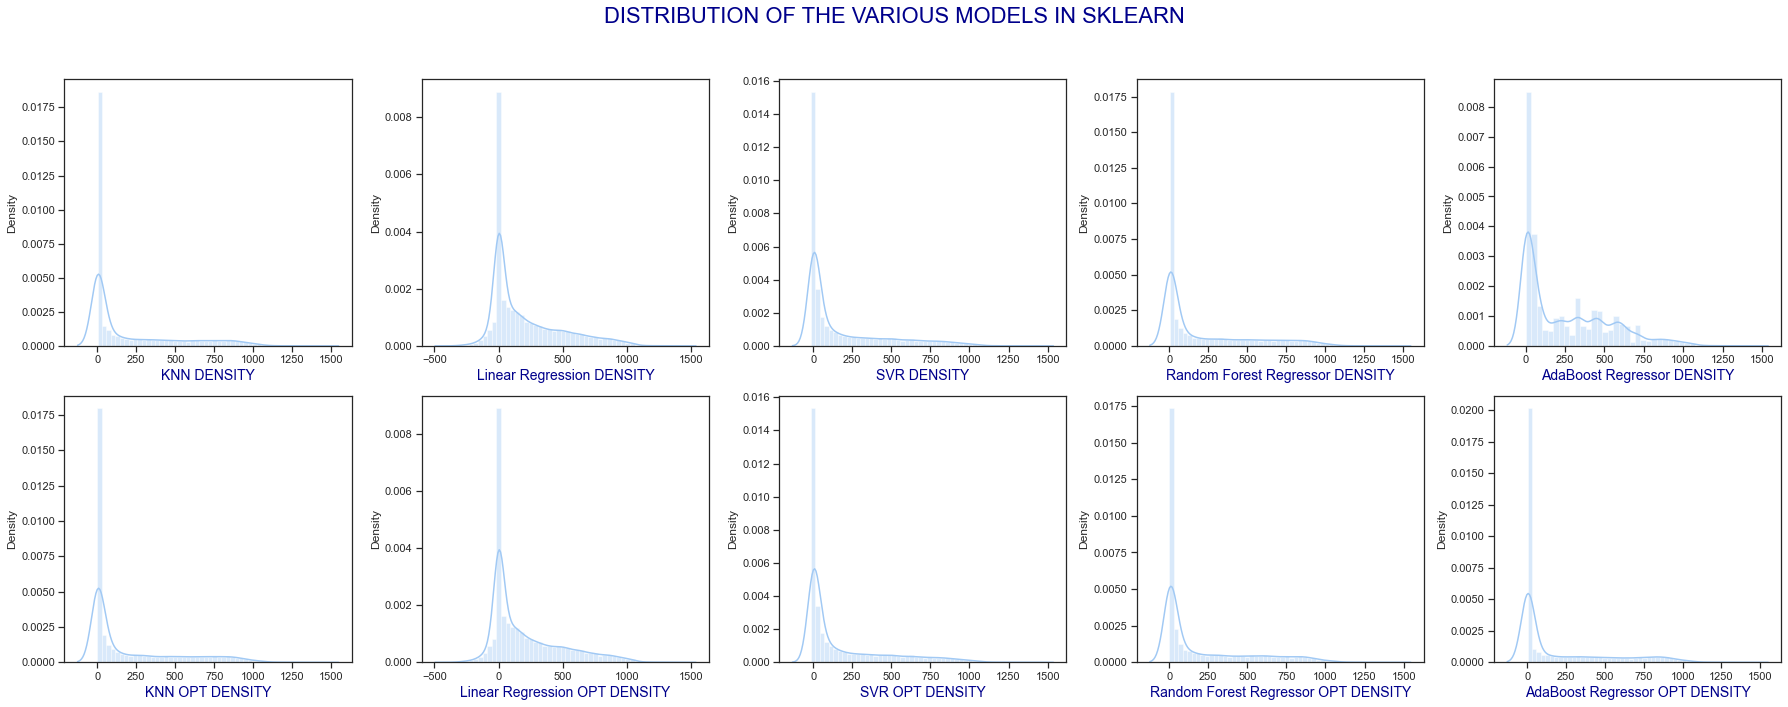

In [96]:
#Density-Plot and Box-Plot
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(nrows =2, ncols = 5, figsize = (25, 10))

sns.distplot((y_test,pred_knn), ax = ax[0,0])
ax[0,0].set_xlabel("KNN DENSITY", color = "darkblue", fontsize = 14)


sns.distplot((y_test,pred_l_reg), ax = ax[0,1])
ax[0,1].set_xlabel('Linear Regression DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_svr), ax = ax[0,2])
ax[0,2].set_xlabel('SVR DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_rf), ax = ax[0,3])
ax[0,3].set_xlabel('Random Forest Regressor DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_adab), ax = ax[0,4])
ax[0,4].set_xlabel('AdaBoost Regressor DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_knn_opt), ax = ax[1,0])
ax[1,0].set_xlabel('KNN OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_l_sgdreg), ax = ax[1,1])
ax[1,1].set_xlabel('Linear Regression OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_svr_sgd), ax = ax[1,2])
ax[1,2].set_xlabel('SVR OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_rf_sgd), ax = ax[1,3])
ax[1,3].set_xlabel('Random Forest Regressor OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_adab_sgd), ax = ax[1,4])
ax[1,4].set_xlabel('AdaBoost Regressor OPT DENSITY', color = "darkblue", fontsize = 14)

fig.suptitle('DISTRIBUTION OF THE VARIOUS MODELS IN SKLEARN', color = "darkblue", fontsize = 22)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

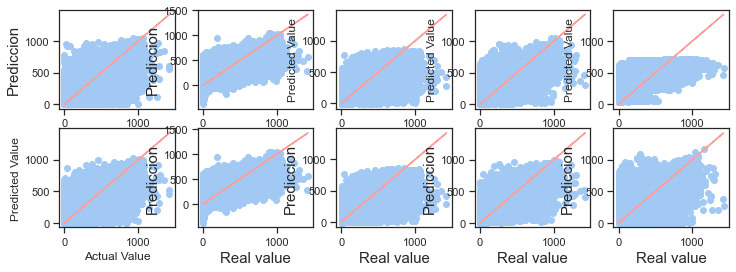

In [99]:
# PLOTTING THE PREDICTIONS
plt.rcParams['figure.figsize']= 12,4

plt.subplot(2,5,1)
plt.scatter(y_test,pred_knn)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15) 

plt.subplot(2,5,2)
plt.scatter(y_test,pred_l_sgdreg)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15) 

plt.subplot(2,5,3)
plt.scatter(y_test,pred_svr)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value')  
plt.ylabel('Predicted Value') 

plt.subplot(2,5,4)
plt.scatter(y_test,pred_rf)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value')  
plt.ylabel('Predicted Value')  

plt.subplot(2,5,5)
plt.scatter(y_test,pred_adab)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value')  
plt.ylabel('Predicted Value') 

plt.subplot(2,5,6)
plt.scatter(y_test,pred_knn_opt)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value')  
plt.ylabel('Predicted Value') 


plt.subplot(2,5,7)
plt.scatter(y_test,pred_l_sgdreg)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15) 

plt.subplot(2,5,8)
plt.scatter(y_test,pred_svr_sgd)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15) 

plt.subplot(2,5,9)
plt.scatter(y_test,pred_rf_sgd)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15) 

plt.subplot(2,5,10)
plt.scatter(y_test,pred_adab_sgd)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15) 

fig.suptitle('PREDICTIONS OF THE VARIOUS MODELS IN SKLEARN', color = "darkblue", fontsize = 22)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

Conclusion
------------
###############################################################################################################################

In [97]:
print('Display R-squared, Adjust R-squared and Root Mean Square Error(RMSE) For Regression Models')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('-----------------------------------------------------------------------------------------------------------------------')
print('*********************************...........INFERENCE AND CONCLUSION.............**************************************')
print('-----------------------------------------------------------------------------------------------------------------------')
results_df= append_results("K Neighbors Regressor",knn,results_df,y_test,pred_knn)
results_df= append_results("Linear Regression", l_reg, results_df, y_test, pred_l_reg)
results_df= append_results("SVR",svr,results_df,y_test,pred_svr)
results_df= append_results("Random Forest Regressor",rf_reg,results_df,y_test,pred_rf)
results_df= append_results("AdaBoost Regressor",adab_reg,results_df,y_test,pred_adab)
results_df= append_results("K Neighbors Regressor opt",knn_opt,results_df,y_test,pred_knn_opt)
results_df= append_results("Linear Regression opt", l_sgdreg, results_df, y_test, pred_l_sgdreg)
results_df= append_results("SVR opt",svr_sgd,results_df,y_test,pred_svr_sgd)
results_df= append_results("Random Forest Regressor opt",rf_sgd,results_df,y_test,pred_rf_sgd)
results_df= append_results("AdaBoost Regressor opt",adab_sgd,results_df,y_test,pred_adab_sgd)
results_df

Display R-squared, Adjust R-squared and Root Mean Square Error(RMSE) For Regression Models
---------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------
*********************************...........INFERENCE AND CONCLUSION.............**************************************
-----------------------------------------------------------------------------------------------------------------------


,Model,Cross Val Score,MAE,MSE,RMSE,R2,AdjustR2
0,K Neighbors Regressor,95.52,30149.93,173.64,0.70,0.70,0.72
1,Linear Regression,157.53,43092.41,207.59,0.57,0.57,0.57
2,SVR,118.34,40157.42,200.39,0.60,0.60,0.60
3,Random Forest Regressor,90.85,25762.19,160.51,0.74,0.74,0.74
4,AdaBoost Regressor,190.60,55311.77,235.18,0.45,0.45,0.54
5,K Neighbors Regressor opt,95.10,28093.33,167.61,0.72,0.72,0.72
6,Linear Regression opt,157.54,43093.01,207.59,0.57,0.57,0.57
7,SVR opt,118.34,40156.50,200.39,0.60,0.60,0.60
8,Random Forest Regressor opt,95.78,26381.58,162.42,0.74,0.74,0.74
9,AdaBoost Regressor opt,81.92,27688.08,166.40,0.72,0.72,0.73


In [98]:
#OPTIMIZED RANDOM FOREST IS THE BEST MODEL FIT WITH R2 AT 74%.

#### Thank You!